<a href="https://colab.research.google.com/github/nanmanchu/bigdata-jip-2020/blob/main/NLP_PN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#https://somjang.tistory.com/entry/Keras%EA%B8%B0%EC%82%AC-%EC%A0%9C%EB%AA%A9%EC%9D%84-%EA%B0%80%EC%A7%80%EA%B3%A0-%EA%B8%8D%EC%A0%95-%EB%B6%80%EC%A0%95-%EC%A4%91%EB%A6%BD-%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0

import codecs 
positive = [] 
negative = [] 
posneg = [] 

pos = codecs.open("/content/gdrive/MyDrive/Colab Notebooks/budongsan/DW/NLP/rising.txt", 'rb', encoding='UTF-8') 

while True: 
  line = pos.readline() 
  line = line.replace('\n', '') 
  positive.append(line) 
  posneg.append(line) 
  
  if not line: break   
pos.close() 

neg = codecs.open("/content/gdrive/MyDrive/Colab Notebooks/budongsan/DW/NLP/falling.txt", 'rb', encoding='UTF-8') 

while True: 
  line = neg.readline() 
  line = line.replace('\n', '') 
  negative.append(line) 
  posneg.append(line) 
  if not line: break 
neg.close()

#po1=set(positive) 중복제거

print(len(positive))
print(len(negative))


246
291


In [3]:
print(positive)

['상승\r', '증가\r', '비싸\r', '비싼\r', '비쌌\r', '최고\r', '고가\r', '오름\r', '올라\r', '강세\r', '급등\r', '솟\r', '과열\r', '승천\r', '활공\r', '등반\r', '공중에 뜨게 올라가\r', '마운트\r', '확장\r', '첨탑\r', '경사\r', '인상\r', '리프트 \r', '호이스트\r', '세우다\r', '마운트\r', 'upraise\r', '향상\r', '후방\r', '일어\r', '발생\r', '일어나\r', '증가\r', '강화\r', '팽창\r', '높이기 \r', '사전 \r', '성장 \r', '이득 \r', '마운트\r', '진행 \r', '사전 \r', '개선 \r', '개발 \r', '출세 \r', '좋은 \r', '이룰 \r', '우선 \r', '도착 \r', '승리\r', '홍보 \r', '사전 \r', '찬양 \r', '영광 \r', '개선 \r', '증대 \r', '강화\r', '높이\r', '해발 고도\r', '힐\r', '마운드\r', '마당\r', '소구\r', '사면\r', '사전\r', '진행\r', '촉진\r', '증가\r', '성장\r', '이득\r', '부스트\r', '전복\r', '상향\r', '스텝\r', '점프\r', '인플레이션\r', '상승\r', '최대 상승\r', '업그레이드\r', '오르막\r', 'acclivity\r', '성장\r', '확대\r', '추가\r', '개발\r', '확장\r', '팽창\r', 'distend\r', '번식\r', '증식\r', 'burgeon\r', '강화\r', '보강\r', '증폭\r', '인상\r', '연장\r', '제일 위\r', '우위\r', '우선 순위\r', '우월\r', '군을\r', '우승\r', '욱일승천\r', '주권\r', 'paramountcy\r', '지배력\r', '영향력\r', '리더십\r', '판도\r', '숙달\r', '지도자\r', '통치자\r', '머리\r', '이

In [9]:
import pandas as pd
import csv
from sklearn import utils, metrics

my_title_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/budongsan/DW/NLP/news_2018_content.csv')
my_title_df.columns=['content']

# df = utils.shuffle(df)

# dataLen=df.shape[0]
# studySize = int(dataLen * 0.8)
# testSize = dataLen - studySize

# train_data = df.iloc[0:studySize] #훈련용 문제
# test_data = df.iloc[studySize:] #테스트용 문제


In [11]:
my_title_df.head

<bound method NDFrame.head of                                                 content
0     ◆ 2018 신년기획 / 재테크 기상도 ◆  올해 재건축·재개발 단지에서 5만가구에...
1      무술년을 여는 이번주에는 1곳 404가구에 대한 청약이 진행된다. 견본주택은 8곳...
2      올해 8월 준공을 앞둔 전남 신안군 새천년대교 건설현장에 2018년 무술년 여명이...
3       해외건설 현장에도 새 희망 쌍용건설이 두바이에서 시공 중인 로열아틀란티스 호텔 ...
4     서울 서계동 청파어린이공원이 소규모 공연과 주민 친목행사 등을 할 수 있는 문화공원...
...                                                 ...
7579  오피스텔 및 상업용 건물의 기준시가가 11년 만에 최대 폭으로 오른다. 특히 201...
7580  주택도시보증공사(이하 HUG)는 제28차 미분양관리지역으로 수도권 5개 및 지방 3...
7581  내년 오피스텔 기준시가가 올해보다 평균 7.52% 상승했습니다.  국세청은 수도권과...
7582  【 앵커멘트 】  새해부터 종부세가 올라가는 등 각종 부동산 제도가 크게 바뀝니다....
7583  지난주 전국 최초로 진행된 위례신도시 신혼희망타운 분양에 1만8천 명이 몰렸습니다....

[7584 rows x 1 columns]>

In [19]:
#import requests 
#from bs4 import BeautifulSoup 
import re 
import pandas as pd 

titles = list(my_title_df['content'])

label = []

for i in range(len(titles)): 
  # re.sub을 통해서 기사 제목에서 특수문자 제거
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', titles[i]) 

  for j in range(len(posneg)): 
    posflag = False 
    negflag = False 
    if j < (len(positive)-1): 
      if clean_title.find(posneg[j]) != -1: 
        posflag = True 
        print(j, "positive?","테스트 : ",clean_title.find(posneg[j]),"비교단어 : ", posneg[j], "인덱스 : ", j, clean_title) 
        break 
    if j > (len(positive)-2): 
      if clean_title.find(posneg[j]) != -1: 
        negflag = True 
        print(j, "negative?","테스트 : ",clean_title.find(posneg[j]),"비교단어 : ", posneg[j], "인덱스 : ", j, clean_title) 
        break 
  if posflag == True: 
    label.append(1)
  elif negflag == True: 
    label.append(-1)
  elif negflag == False and posflag == False: 
    label.append(0)
  
# 데이터를 넣어준 label 리스트를 my_title_df에 추가
my_title_df['label'] = label
my_title_df
#my_title_df = {"content":[], "label":label}

#j = 0

# for i in range(len(titles)): 
#   # re.sub을 통해서 기사 제목에서 특수문자 제거
#     clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', titles[i]) 
#     #my_title_df['content'].append(clean_title)

#     for j in range(len(posneg)): 
#         posflag = False 
#         negflag = False 
#         if j < (len(positive)-1): 
#             if clean_title.find(posneg[j]) != -1: 
#                 posflag = True 
#                 print(j, "positive?","테스트 : ",clean_title.find(posneg[j]),"비교단어 : ", posneg[j], "인덱스 : ", j, clean_title) 
#                 break 
#         if j > (len(positive)-2): 
#             if clean_title.find(posneg[j]) != -1: 
#                 negflag = True 
#                 print(j, "negative?","테스트 : ",clean_title.find(posneg[j]),"비교단어 : ", posneg[j], "인덱스 : ", j, clean_title) 
#                 break 
#     if posflag == True: 
#         label.append(1)
#     elif negflag == True: 
#         label.append(-1)
#     elif negflag == False and posflag == False: 
#         label.append(0)
#     j=j+1



# for i in range(len(titles)): 
#   # re.sub을 통해서 기사 제목에서 특수문자 제거
#   clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', titles[i]) 
    
#   for j in range(len(posneg)): 
#     posflag = False 
#     negflag = False 
#     if j < (len(positive)-1): 
#       if clean_title.find(posneg[j]) != -1: 
#         posflag = True 
#         print(j, "positive?","테스트 : ",clean_title.find(posneg[j]),"비교단어 : ", posneg[j], "인덱스 : ", j, clean_title) 
#         break 
#     if j > (len(positive)-2): 
#       if clean_title.find(posneg[j]) != -1: 
#         negflag = True 
#         print(j, "negative?","테스트 : ",clean_title.find(posneg[j]),"비교단어 : ", posneg[j], "인덱스 : ", j, clean_title) 
#         break 
#   if posflag == True: 
#     label.append(1)
#   elif negflag == True: 
#     label.append(-1)
#   elif negflag == False and posflag == False: 
#     label.append(0)

  
# 데이터를 넣어준 label 리스트를 my_title_df에 추가
my_title_df['label'] = label
my_title_df


245 negative? 테스트 :  0 비교단어 :   인덱스 :  245 ◆ 2018 신년기획  재테크 기상도 ◆  올해 재건축·재개발 단지에서 5만가구에 육박하는 새 아파트가 일반 분양된다 분양 가구 수뿐 아니라 연간 분양 물량에서 차지하는 재건축·재개발 비중으로도 집계 이래 최대치다 정부의 부동산 규제로 서울과 지방 간 시장 양극화가 커질 것으로 보이는 가운데 서울 집값 향방을 좌우할 중요 변수가 될 전망이다 내년 이후엔 재건축·재개발 물량이 줄어들 가능성이 커 서울·수도권 실수요자들 간 청약전쟁이 예상된다31일 매일경제신문이 부동산정보업체인 닥터아파트와 함께 시공능력평가 상위 100대 건설사를 조사한 결과 올해 공급되는 일반분양 물량은 28만1567가구로 작년21만387가구보다 34 많다 올해 예정된 재개발·재건축 등 정비사업 일반분양 물량은 4만9339가구로 전체 일반분양 물량의 175를 차지한다 이 같은 정비사업 물량과 비중은 둘 다 역대 최고다 작년 재건축·재개발 분양 물량3만1524가구에 비해 565 늘어난 것이다 정비사업 물량이 대폭 늘어난 것은 지난해부터 올해까지 부동산경기 호황이 이어진 가운데 올해 새 정부 출범을 전후해 재건축 규제 등을 피하기 위해 사업추진을 서두른 사업장이 많았기 때문이다고종완 한국자산관리연구원 원장은 2018년 서울 부동산 향방과 집값을 이끄는 건 단연 강남권 개포동 일대 재건축 물량이라며 그 이후론 규제로 사업을 미루는 재건축 단지가 늘면서 물량이 줄어들 가능성이 큰 만큼 강남권 진입을 노리는 실수요자들은 눈여겨봐야 한다고 말했다정비사업을 통해 공급되는 아파트 단지는 교통·교육·쇼핑 등 기존 인프라스트럭처를 고스란히 이용할 수 있어 수요자에게 인기가 높다 올해 100대 건설사가 분양하는 전국 정비사업장 수는 총 108개로 집계됐다 닥터아파트는 이 중 입지여건이 우수하고 개발호재가 풍부한 랜드마크로 평가돼 블로그나 카페 인터넷 등에서 많이 언급되는 단지로 25개를 추렸다 서울 강남구에서는 개포동 재건축 단지 2곳이 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 인덱스 :  245  지방 부동산 시장의 명암이 갈리고 있다 올해 들어 지방 집값이 전체적으로 092 하락했지만 세종 대구 광주 등은 집값이 꾸준히 오르고 있다 그 대신 부산 울산 등은 어려움을 겪고 있다20일 매일경제가 한국감정원과 국토교통부 등 자료를 분석해 본 결과 노후 아파트 비율이 높고 수요에 비해 공급이 부족한 지역은 지방이라도 청약경쟁률과 집값 상승률이 모두 높았다 대구와 광주가 대표적이다 행정수도 이전으로 없던 수요가 계속 유입되고 있지만 공급이 따라가지 못하는 세종시도 마찬가지였다세 지역의 청약경쟁률은 작년부터 모두 최소 두 자릿수를 기록했고 세 자릿수까지 나온 경우도 많았다 이들 지역의 집값도 상승세를 타고 있다 2018년 1월 1일4월 16일 한국감정원이 집계한 주택매매가격 변동률을 보면 올해 누적으로 대구는 078 광주는 080 올랐다 세종시도 050 상승했다 대구와 광주는 서울33 다음으로 집값 상승률이 높았다박원갑 KB국민은행 WM스타자문단 부동산수석전문위원은 대구와 광주는 최근 공급이 워낙 없었기 때문에 탄탄하게 시장이 버텨주고 있다며 대구는 재건축 개발과 교육수요가 많고 광주 역시 자연발생적으로 무난한 흐름이 이어질 것으로 보인다고 분석했다 세종시에 대해서는 교육수요 투자수요 미래수요 등 삼박자를 고루 갖춰 주변 수요를 빨아들이고 있다며 일종의 삼투압효과로 충청권 수요를 흡수하는 중심지로 자리매김할 가능성이 매우 높다고 말했다반면 공급이 과잉으로 치닫는 곳의 상황은 악화 일로다 공급과잉과 입주 폭탄이 겹친 부산이 대표적이다 부산 아파트 가격은 작년 한 해 109 오르면서 서울055을 뛰어넘는 상승세를 보였지만 올해 들어서는 4개월이 채 안 돼 102 떨어지며 어려움을 겪고 있다 설상가상으로 올해 부산에서는 3만8000여 가구의 분양 물량이 쏟아지는데 이는 전년 2만2790가구보다 70 늘어난 것이다 2002년 4만630가구가 공급된 이후 16년 만에 가장 많은 물량이기도 하다 부산에서는 해운대 등 기존 시장을 이끌던 대장 지역은 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 negative? 테스트 :  0 비교단어 :   인덱스 :  245   별내신도시 최초의 업무·쇼핑·문화·주거시설이 결합된 대규모 복합단지가 공급된다 동양건설산업은 오는 10월 남양주 별내지구 714블록에서 파라곤 스퀘어를 분양할 예정이라고 28일 밝혔다 이 단지는 지하 3층지상 최고 21층 3개동 규모로 조성되며 강북 최대 규모의 섹션오피스형 지식산업센터인 파라곤 타워지상 321층 섹션오피스 801실 오피스용 주거시설 전용 16·34㎡ 304실와 국내 최초 키즈맘 전문 상업시설인 파라곤 스퀘어지하 1층지상 3층 5만940㎡로 구성된다파라곤 스퀘어에는 키즈 관련 시설을 비롯한 문화 외식 및 보육시설과 함께 어린이들을 위한 다양한 체험시설이 들어설 예정이다 사업지 주변에 흐르는 용암천변을 따라 400여m 길이의 스트리트 테라스 상가로 조성해 별내지구 내 명소로 자리 매김할 전망이다 특히 지상층은 명작동화 오즈의 마법사를 테마로 각종 조형물과 놀이시설 포토존으로 구성된 오즈 테마존으로 꾸며진다지식산업센터인 파라곤 타워는 소형 모듈형으로 설계해 입주자에 따른 다양한 공간 구성이 가능하다 또한 입주민을 위한 휴게공간 회의룸 피트니스센터샤워실 보육시설 옥상정원 등 다양한 부대시설이 마련될 예정이다 세금 감면혜택도 받을 수 있다 별내지구는 수도권 정비계획법상 성장관리지역으로 과밀억제권역에서 파라곤 타워로 이주할 경우 취득세와 재산세 감면과 함께 법인세 감면4년간 100 이후 2년간 50 혜택을 받을 수 있다 분양가의 최대 80까지 잔금대출이 가능하며 전매제한이 없다경춘선 별내역을 걸어서 이용할 수 있고 향후 지하철 8호선 연장선2023년 예정이 개통하면 대중교통여건은 더욱 좋아질 예정이다 외곽순환도로 별내IC 포천세종고속도로 덕릉터널 개통 등의 교통망도 편리하게 이용할 수 있다 디지털뉴스국 조성신 기자ⓒ 매일경제  mkcokr 무단전재 및 재배포 금지br
245 negative? 테스트 :  0 비교단어 :   인덱스 :  245  재건축을 추진 중인 서울 서초구 방

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



테스트 :  0 비교단어 :   인덱스 :  245   반도건설은 지난 8일 남양주 지금·도농2구역 도시환경정비사업 주상복합 프로젝트의 시공사로 선정됐다고 11일 밝혔다 이 사업은 경기도 남양주시 경춘로 361번지 일대에 지하 4층지상 33층 2개동 아파트 194가구 및 부대복리시설을 짓는 주상복합 신축 사업이다 총 도급금액은 약 453억원이다 단지는 47㎡형 49가구 59㎡형 114가구 67㎡형 31가구로 소비자들의 선호도가 높은 중소형 타입으로 구성된다 올 하반기에 착공 예정이다  지금·도농2구역 주상복합은 경의중앙선 도농역과 구리역이 사이의 역세권에 위치했다 서울외곽순환도로 경춘로 및 북부간선도로가 인접한 사통팔달의 교통 요충지로 서울 및 인근 지역으로 이동이 용이하다 특히 잠실 및 강남까지 자동차로 2030분 거리로 접근성이 매우 우수하다 반도건설 관계자는남양주 지금·도농2구역 도시환경정비사업은 최고 33층의 고층 주상복합으로서 지금·도농 뉴타운의 랜드마크 단지가 될 것이라며 앞으로도 사업성 있는 곳을 면밀히 검토해 도시환경정비사업뿐만 아니라 재개발 지역주택조합사업도 꾸준히 진행할 계획이라고 말했다최재원 기자ⓒ 매일경제  mkcokr 무단전재 및 재배포 금지br
245 negative? 테스트 :  0 비교단어 :   인덱스 :  245 국내 건설현장에서 근로 중인 15만9000명의 불법 외국인력에 대한 합법적 활용 대책이 시급하다는 주장이 나왔다  11일 대한건설협회가 한국이민학회에 의뢰해 실시한 건설업 외국인력 실태 및 공급체계 개선방안 최종 연구보고서에 따르면 건설현장에 종사하는 외국인근로자는 22만6391명2018년 5월 기준으로 전체 건설근로자의 195에 달하는 것으로 나타났다 이런 수치는 공사금액이 1억원 이상인 1280개 국내 건설현장 실태조사 결과와 통계청 자료 등 행정통계를 종합해 추산한 결과다건설현장에 종사하고 있는 외국인력 22만6000명 중 합법인원 6만7000명일반 E9 1만2000명 방문취업동포 H2 5만5000명을 제외한 최소

content  label
0     ◆ 2018 신년기획 / 재테크 기상도 ◆  올해 재건축·재개발 단지에서 5만가구에...     -1
1      무술년을 여는 이번주에는 1곳 404가구에 대한 청약이 진행된다. 견본주택은 8곳...     -1
2      올해 8월 준공을 앞둔 전남 신안군 새천년대교 건설현장에 2018년 무술년 여명이...     -1
3       해외건설 현장에도 새 희망 쌍용건설이 두바이에서 시공 중인 로열아틀란티스 호텔 ...     -1
4     서울 서계동 청파어린이공원이 소규모 공연과 주민 친목행사 등을 할 수 있는 문화공원...     -1
...                                                 ...    ...
7579  오피스텔 및 상업용 건물의 기준시가가 11년 만에 최대 폭으로 오른다. 특히 201...     -1
7580  주택도시보증공사(이하 HUG)는 제28차 미분양관리지역으로 수도권 5개 및 지방 3...     -1
7581  내년 오피스텔 기준시가가 올해보다 평균 7.52% 상승했습니다.  국세청은 수도권과...     -1
7582  【 앵커멘트 】  새해부터 종부세가 올라가는 등 각종 부동산 제도가 크게 바뀝니다....     -1
7583  지난주 전국 최초로 진행된 위례신도시 신혼희망타운 분양에 1만8천 명이 몰렸습니다....     -1

[7584 rows x 2 columns]

In [21]:
print(my_title_df)

                                                content  label
0     ◆ 2018 신년기획 / 재테크 기상도 ◆  올해 재건축·재개발 단지에서 5만가구에...     -1
1      무술년을 여는 이번주에는 1곳 404가구에 대한 청약이 진행된다. 견본주택은 8곳...     -1
2      올해 8월 준공을 앞둔 전남 신안군 새천년대교 건설현장에 2018년 무술년 여명이...     -1
3       해외건설 현장에도 새 희망 쌍용건설이 두바이에서 시공 중인 로열아틀란티스 호텔 ...     -1
4     서울 서계동 청파어린이공원이 소규모 공연과 주민 친목행사 등을 할 수 있는 문화공원...     -1
...                                                 ...    ...
7579  오피스텔 및 상업용 건물의 기준시가가 11년 만에 최대 폭으로 오른다. 특히 201...     -1
7580  주택도시보증공사(이하 HUG)는 제28차 미분양관리지역으로 수도권 5개 및 지방 3...     -1
7581  내년 오피스텔 기준시가가 올해보다 평균 7.52% 상승했습니다.  국세청은 수도권과...     -1
7582  【 앵커멘트 】  새해부터 종부세가 올라가는 등 각종 부동산 제도가 크게 바뀝니다....     -1
7583  지난주 전국 최초로 진행된 위례신도시 신혼희망타운 분양에 1만8천 명이 몰렸습니다....     -1

[7584 rows x 2 columns]


In [22]:
def dftoCsv(my_title_df, num): 
  my_title_df.to_csv(('/content/gdrive/MyDrive/Colab Notebooks/budongsan/DW/NLP'+ str(num) +'.csv'), sep=',', na_rep='NaN', encoding='utf-8')


In [24]:
my_title_df.head()

content  label
0  ◆ 2018 신년기획 / 재테크 기상도 ◆  올해 재건축·재개발 단지에서 5만가구에...     -1
1   무술년을 여는 이번주에는 1곳 404가구에 대한 청약이 진행된다. 견본주택은 8곳...     -1
2   올해 8월 준공을 앞둔 전남 신안군 새천년대교 건설현장에 2018년 무술년 여명이...     -1
3    해외건설 현장에도 새 희망 쌍용건설이 두바이에서 시공 중인 로열아틀란티스 호텔 ...     -1
4  서울 서계동 청파어린이공원이 소규모 공연과 주민 친목행사 등을 할 수 있는 문화공원...     -1

# **데이터 분석해보기**

In [26]:
# my_title_dic  = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/budongsan/DW/NLP/news_2018_2.csv')
# my_title_dic .columns=['title']

# df = utils.shuffle(df)

dataLen=my_title_df.shape[0]
studySize = int(dataLen * 0.8)
testSize = dataLen - studySize

train_data = my_title_df.iloc[0:studySize] 
test_data = my_title_df.iloc[studySize:] 


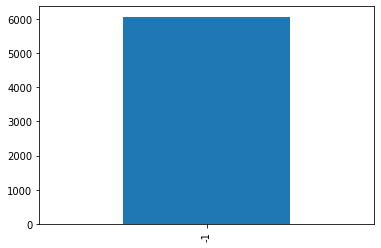

In [27]:
%matplotlib inline 
import matplotlib.pyplot as plt

train_data['label'].value_counts().plot(kind='bar')


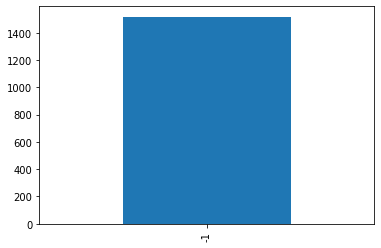

In [28]:
test_data['label'].value_counts().plot(kind='bar')


In [29]:
print(train_data.groupby('label').size().reset_index(name='count')) 
print(test_data.groupby('label').size().reset_index(name='count'))



   label  count
0     -1   6067
   label  count
0     -1   1517


# **모델만들기**

In [30]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [31]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 232kB/s 
     |████████████████████████████████| 460kB 43.6MB/s 
     |████████████████████████████████| 92kB 8.6MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [32]:
import konlpy 
from konlpy.tag import Okt 
okt = Okt() 
X_train = [] 

for sentence in train_data['content']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_train.append(temp_X) 
  
X_test = [] 
for sentence in test_data['content']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_test.append(temp_X)



In [ ]:
print(X_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from keras.preprocessing.text import Tokenizer
max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)



제목의 최대 길이 :  2605
제목의 평균 길이 :  351.29068241469815


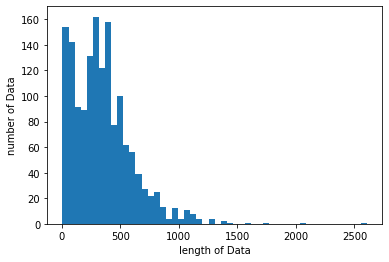

In [ ]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train)) 
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()



제목의 최대 길이 :  1152
제목의 평균 길이 :  305.8083989501312


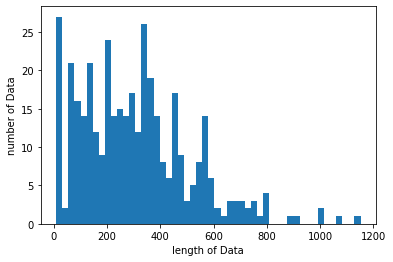

In [ ]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()



In [ ]:
import numpy as np 
y_train = [] 
y_test = [] 
for i in range(len(train_data['label'])): 
  if train_data['label'].iloc[i] == 1: 
    y_train.append([0, 0, 1]) 
  elif train_data['label'].iloc[i] == 0: 
    y_train.append([0, 1, 0]) 
  elif train_data['label'].iloc[i] == -1: 
    y_train.append([1, 0, 0]) 
    
for i in range(len(test_data['label'])): 
  if test_data['label'].iloc[i] == 1: 
    y_test.append([0, 0, 1]) 
  elif test_data['label'].iloc[i] == 0: 
    y_test.append([0, 1, 0]) 
  elif test_data['label'].iloc[i] == -1: 
    y_test.append([1, 0, 0]) 
    
y_train = np.array(y_train) 
y_test = np.array(y_test)



In [ ]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

# **모델 만들기**

In [ ]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)



In [ ]:
# model = Sequential() 
# model.add(Embedding(max_words, 100)) 
# model.add(LSTM(128)) 
# model.add(Dense(3, activation='softmax')) 

# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
# history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)



Epoch 1/10
138/138 [==============================] - 6s 42ms/step - loss: 0.0283 - accuracy: 0.9927 - val_loss: 5.4774e-07 - val_accuracy: 1.0000
Epoch 2/10
138/138 [==============================] - 5s 38ms/step - loss: 9.6863e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
138/138 [==============================] - 5s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
138/138 [==============================] - 5s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
138/138 [==============================] - 5s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
138/138 [==============================] - 5s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
138/138 [==============================] - 5s 38ms/step - loss: 0.0000e+00 - accuracy: 

In [ ]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
138/138 [==============================] - 9s 66ms/step - loss: 0.0701 - accuracy: 0.9949 - val_loss: 4.7684e-07 - val_accuracy: 1.0000
Epoch 2/10
138/138 [==============================] - 8s 61ms/step - loss: 4.2841e-07 - accuracy: 1.0000 - val_loss: 4.1528e-07 - val_accuracy: 1.0000
Epoch 3/10
138/138 [==============================] - 8s 61ms/step - loss: 3.8763e-07 - accuracy: 1.0000 - val_loss: 3.6854e-07 - val_accuracy: 1.0000
Epoch 4/10
138/138 [==============================] - 9s 63ms/step - loss: 3.1067e-07 - accuracy: 1.0000 - val_loss: 2.6725e-07 - val_accuracy: 1.0000
Epoch 5/10
138/138 [==============================] - 9s 63ms/step - loss: 2.6181e-07 - accuracy: 1.0000 - val_loss: 2.4777e-07 - val_accuracy: 1.0000
Epoch 6/10
138/138 [==============================] - 9s 63ms/step - loss: 2.3998e-07 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 7/10
138/138 [==============================] - 9s 62ms/step - loss: 2.3842e-07 - accuracy: 

In [ ]:
print("\n 테스트 정확도:{:.2f}%".format(model.evaluate(X_test,y_test)[1]*100))

12/12 [==============================] - 0s 7ms/step - loss: 2.3842e-07 - accuracy: 1.0000

 테스트 정확도:100.00%


In [ ]:
predict = model.predict(X_test)


In [ ]:
import numpy as np 
predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(y_test, axis=1)



In [ ]:
for i in range(30): 
  print("기사제목 : ", test_data['content'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])



기사제목 :  저금리 기조가 이어지고 마땅한 투자처를 찾지 못한 시중의 자금이 수익형 부동산으로 몰리고 있다. 대표적인 수익형 부동산으로는 원룸텔, 오피스텔, 도시형생활주택 등을 들 수 있는데, 예금 금리보다 높은 월세를 기대할 수 있는 투자처로 관심을 끌고 있다. <center><img src='http://img.mbn.co.kr/filewww/news/other/2012/12/14/122020241525.jpg' width='500' /></center> 도시형생활주택의 경우 60㎡ 이하인 경우 임대사업자의 취득세가 면제되고 40㎡ 이하인 경우 재산세도 면제된다. 아울러 종합부동산세 합산배제(서울 이외 지역의 국민주택규모이하), 양도세 중과배제(6억 이하 3회 이상, 5년 이상 임대 시) 등 세제혜택을 누릴 수 있다.서울 근교 경기도권에서도 도시형생활주택으로 쏠쏠한 임대수익을 올릴 수 있는 곳이 있다. 파주시 연풍리에 자리한 ‘파주 그린힐 도시형생활주택’ 단계별로 대단지로 조성 중에 있으며 원룸부터 쓰리룸까지 혼합형단지로 구성될 예정에 있어 선택의 폭이 넓다.또한 파주 그린힐의 경우 일반 도시형 주택과는 확연하게 주거환경이 차별화돼 있다. 도시형생활주택으로는 드물게 274세대 대단지로 개발되며 인접한 산과 개울을 활용한 쾌적한 주거환경도 돋보인다.또한 LG그룹의 산업단지 조성과 함께 최근 행정안전부가 파주 페라리월드를 최종 승인함에 따라 투자가치는 더욱 상승하고 있다. 페라리월드는 미군 공여지 주변 지역 개발사업의 일환으로 2017년까지 파주역 뒤편 백석리 일대 370만㎡에 들어서며 페라리월드, 숙박시설, 주거시설, 상업시설을 짓는 대형 개발프로젝트다.주변에는 파주출판단지와 한류월드, 헤이리예술마을이 자리잡고 있어 문화적인 면에서도 우수하다. 영어마을, 판문점, 임진각, 프로방스마을, 첼시 아울렛 등 문화, 관광, 교육도 뛰어나다.파주 그린힐의 분양 관계자는 “파주의 산업화에 따라 2020년까지 66만 인구 유입이 예상되고 주거 임대수요가 풍부해 투자가치

In [ ]:
import sys
print(sys.version)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
